In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp # scipy expands on numpy with additional functionality for scientific computing

In [ ]:
# 1.1 (anharmonic hamiltonian in harmonic eigenbasis)
def anharmonic_hamiltonian(lam, N_t): # N_t: truncation size, lam: coefficient of anharmonic term x^4 (h_bar, m, omega = 1)
    # use masking instead of loops over i,j with kroncker deltas to build raising/lowering operators
    I, J = np.indices((N_t, N_t)) # np.indices returns a tuple of arrays representing the indices of a grid (I[i,j] = i, J[i,j] = j)
    mask_1 = (I == J + 1)   # boolean array; mask_1[i,j] is True iff i == j+1 (subdiagonal), else False
    mask_2 = (I == J - 1)   # boolean array; mask_2[i,j] is True iff i == j-1 (superdiagonal), else False
    a_dag = np.where(mask_1, np.sqrt(I), 0.0)  # (a_dag)_{i,j} = sqrt(i) if i == j+1, else 0
    a = np.where(mask_2, np.sqrt(J), 0.0)  #  a_{i,j}  = sqrt(j) if i == j-1, else 0
    x = np.sqrt(1/2)* (a_dag + a) # position operator x in terms of a and a_dag
    N = a_dag @ a # number operator N = a_dag @ a (@ = matrix multiplication, * = element-wise multiplication)
    H = N + (1/2) * np.identity(N_t) + lam*(np.linalg.matrix_power(x, 4)) # Hamiltonian H = N + 1/2 + lam*x^4
    return H

lam = 1
N_t = 10
H = anharmonic_hamiltonian(lam, N_t)
H_rounded = np.round(H, 3)
print(H_rounded)

[[ 1.25   0.     2.121  0.     1.225  0.     0.     0.     0.     0.   ]
 [ 0.     5.25   0.     6.124  0.     2.739  0.     0.     0.     0.   ]
 [ 2.121  0.    12.25   0.    12.124  0.     4.743  0.     0.     0.   ]
 [ 0.     6.124  0.    22.25   0.    20.125  0.     7.246  0.     0.   ]
 [ 1.225  0.    12.124  0.    35.25   0.    30.125  0.    10.247  0.   ]
 [ 0.     2.739  0.    20.125  0.    51.25   0.    42.125  0.    13.748]
 [ 0.     0.     4.743  0.    30.125  0.    70.25   0.    56.125  0.   ]
 [ 0.     0.     0.     7.246  0.    42.125  0.    92.25   0.    50.912]
 [ 0.     0.     0.     0.    10.247  0.    56.125  0.    94.75   0.   ]
 [ 0.     0.     0.     0.     0.    13.748  0.    50.912  0.    47.75 ]]


'At lambda = 0, the eigenvalues remain constant for all N_t because they are the exact eigenvalues of the quantum harmonic oscillator. However, as lambda increases, the eigenvalues are no longer constant with respect to N_t. They oscillate and converge more slowly, indicating that a larger truncation size is needed to accurately capture the effects of the anharmonic term in the Hamiltonian. The value that the eigenvalues converge to also increases with larger lambda, reflecting the increased energy levels due to the anharmonicity. The higher energy levels (higher k) tend to converge more slowly than the lower ones, especially at larger lambda values because they are more affected by the anharmonic term.'

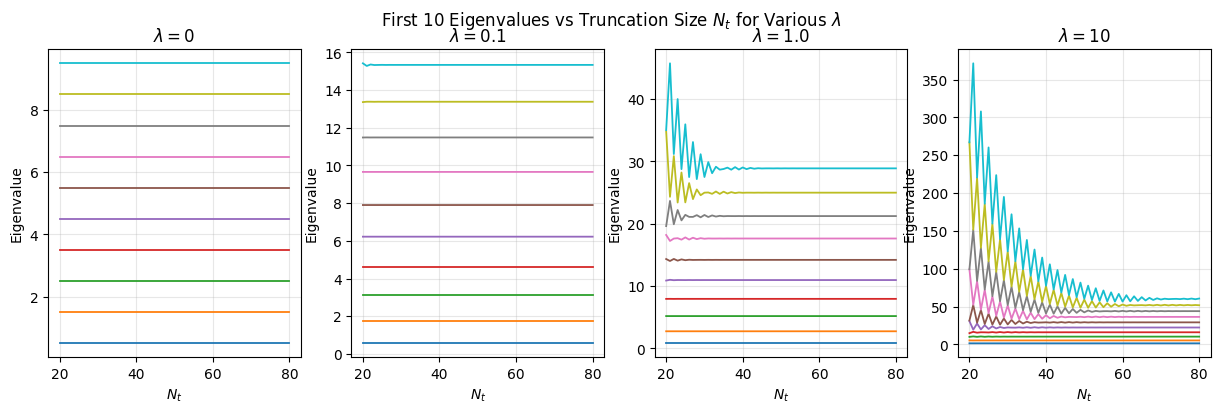

In [24]:
# 1.2 (eigenvalues of anharmonic hamiltonian)
def get_k_eigvals(lam, N_t, k): # return first k eigenvalues of anharmonic hamiltonian for given lam and N_t
    H = anharmonic_hamiltonian(lam, N_t)
    eigvals = sp.linalg.eigvalsh(H) # use scipy's eigvalsh for Hermitian matrices
    return eigvals[:k]

lams = [0, 0.1, 1.0, 10]
N_ts = np.arange(20,81)
k = 10
fig, axs = plt.subplots(1, len(lams), figsize=(15,4)) # fig = whole figure, axs = 1 x len(lam_list) array of empty subplots (15x4 inches)
fig.suptitle(f"First {k} Eigenvalues vs Truncation Size $N_t$ for Various $\lambda$") # overall title for figure
for idx, lam in enumerate(lams): # enumerate(lam_list) gives (index, value) pairs (i.e. 0, 0), (1, 0.1), (2, 1.0), ...
    eig_arr = np.zeros(shape = (k, len(N_ts))) # array to hold first k eigenvalues for each N_t
    for col, N_t in enumerate(N_ts): # enumerate(N_ts) gives (index, value) pairs (i.e. 0, 20), (1, 21), ...)
        eigvals = get_k_eigvals(lam, N_t, k)
        eig_arr[:, col] = eigvals # store eigenvalues in column corresponding to N_t
    axs[idx].plot(N_ts, eig_arr.T, lw=1.3) # plot each eigenvalue (rows of eig_arr) vs N_t for idx'th subplot
    axs[idx].set_title(rf"$\lambda={lam}$") # latex formatting with raw string (rf"")
    axs[idx].set_xlabel(r"$N_t$")
    axs[idx].set_ylabel("Eigenvalue")
    axs[idx].grid(alpha=0.3) # alpha sets transparency of grid lines

'At lambda = 0, the eigenvalues remain constant for all N_t because they are the exact eigenvalues of the quantum harmonic oscillator. However, as lambda increases, the eigenvalues are no longer constant with respect to N_t. They oscillate and converge more slowly, indicating that a larger truncation size is needed to accurately capture the effects of the anharmonic term in the Hamiltonian. The value that the eigenvalues converge to also increases with larger lambda, reflecting the increased energy levels due to the anharmonicity. The higher energy levels (higher k) tend to converge more slowly than the lower ones, especially at larger lambda values because they are more affected by the anharmonic term.'


Fitted line: ln(E_0) ~ 0.282983 * ln(lambda) + -0.218830
Thus, for large lambda, the ground state energy scales as E_0 ~ (lambda^0.282983) (power law relationship).


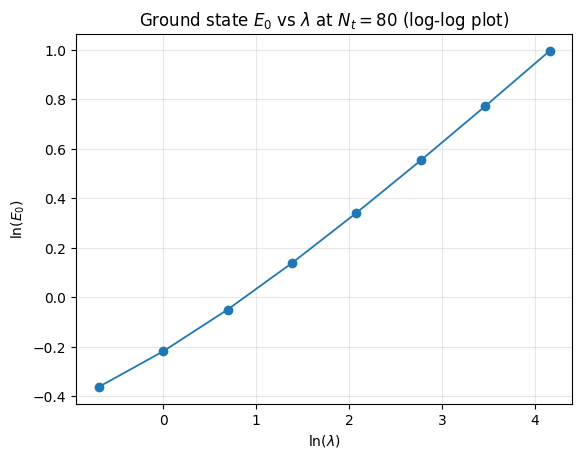

In [85]:
# 1.3 (ground state energy vs lambda)
lams = np.array([0.5*2**n for n in range(8)]) # lambda values: 0.5, 1, 2, 4, 8, 16, 32, 64
N_t = 80
k = 1

E_0s = [get_k_eigvals(lam, N_t, k)[0] for lam in lams] # list of ground state energies for each lambda
log_lams = np.log(lams)
log_E_0s = np.log(E_0s)
plt.plot(log_lams, log_E_0s, '-o', lw=1.3) # plot ln(E_0) vs ln(lambda), roughly linear for large lambda
plt.xlabel(r"$ \ln(\lambda$)")
plt.ylabel(r"$\ln(E_0$)")
plt.title(r"Ground state $E_0$ vs $\lambda$ at $N_t=80$ (log-log plot)")
plt.grid(alpha=0.3)

c_1 = np.polyfit(log_lams, log_E_0s, 1) # fit polynomial of degree 1 (line) to ln(E_0s) = c_1[0]*ln(lams) + c_1[1] 
print(f"Fitted line: ln(E_0) ~ {c_1[0]:.6f} * ln(lambda) + {c_1[1]:.6f}")
print(f"Thus, for large lambda, the ground state energy scales as E_0 ~ (lambda^{c_1[0]:.6f}) (power law relationship).")

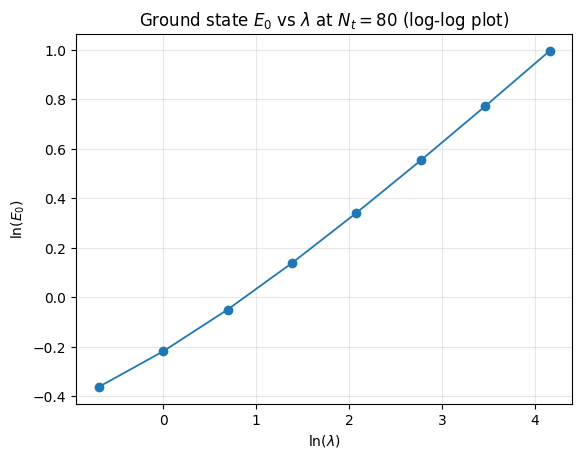

In [ ]:
#1.4 (uncertainty principle)

def get_k_eig(lam, N_t, k): # return first k eigenvalues and eigenvectors of anharmonic hamiltonian for given lam and N_t
    H = anharmonic_hamiltonian(lam, N_t)
    eigvals, eigvecs = sp.linalg.eigh(H) 
    return eigvals[k-1], eigvecs[k-1]

k = 10
N_t = 80
k_eigval, k_eigvec = get_k_eig(lam, N_t, k)
norm = np.linalg.norm(k_eigvec)
norm_k_eigvec = k_eigvec/norm
x^2 
var_x = np.sqrt()
var_p 

E_ks = [get_k_eigvals(lam, N_t, k)[k-1] for lam in lams] # list of kth eigenvalues for each lambda
log_lams = np.log(lams)
log_E_0s = np.log(E_0s)
plt.plot(log_lams, log_E_0s, '-o', lw=1.3) # plot ln(E_0) vs ln(lambda), roughly linear for large lambda
plt.xlabel(r"$ \ln(\lambda$)")
plt.ylabel(r"$\ln(E_0$)")
plt.title(r"Ground state $E_0$ vs $\lambda$ at $N_t=80$ (log-log plot)")
plt.grid(alpha=0.3)


